In [1]:
from dna_features_viewer.FootprintViewer import (
        plot_region_with_footprints, 
        plot_multi_tissue_comparison,
        FootprintDataProcessor,
        GenBankCreator,
        FootprintVisualizer
    )

# 导入其他必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

/home/wuyuechao/software/DnaFeaturesViewer/.venv/lib/python3.12/site-packages/BCBio/GFF/GFFParser.py:71: SyntaxWarning: invalid escape sequence '\w'
  gff3_kw_pat = re.compile("\w+=")


In [2]:
# 设置测试数据路径
data_config = {
    "genome_fasta": None,
    "gff3_file": "./data/arabidopsis_test.gff3",
    "fp_files": {
        "inflorescence": "./data/arabidopsis_inflorescence_test.parquet",
        "leaf": "./data/arabidopsis_leaf_test.parquet", 
        "root": "./data/arabidopsis_root_test.parquet"
    },
    "target_region": {
        "chrom": "Chr4",
        "start": 18487724,
        "end": 18489875
    }
}

#### Single tissue FootPrint

Single tissue FootPrint
正在为区域 Chr4:18487724-18489875 创建GenBank文件...
正在解析GFF3文件中 Chr4:18487724-18489875 区域的特征...
收集到 3 个转录本映射
处理了 169 个特征，找到 84 个目标类型特征
最终添加到GenBank的特征数: 12
正在加载footprint分数数据...
找到 54945 个footprint数据点
数据最大值: 3.567, colorbar最大值: 3.567
正在绘制基因注释（使用智能布局）...
识别到的转录本:
  AT4G39850.1: 4个组件
    - 5UTR: 795-1046
    - 5UTR: 1413-1496
    - CDS: 1496-1558
    - CDS: 1651-1937
  AT4G39850.2: 4个组件
    - 5UTR: 713-1046
    - 5UTR: 1413-1496
    - CDS: 1496-1558
    - CDS: 1651-1937
  AT4G39850.3: 4个组件
    - 5UTR: 713-1046
    - 5UTR: 1413-1496
    - CDS: 1496-1558
    - CDS: 1651-1937

布局结果（共3行）:
  第1行: AT4G39850.1
  第2行: AT4G39850.2
  第3行: AT4G39850.3
正在绘制footprint分数热图...


/home/wuyuechao/software/DnaFeaturesViewer/dna_features_viewer/FootprintViewer/api.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


图片已保存到: ./output/single_tissue_footprint.pdf
临时GenBank文件已清理


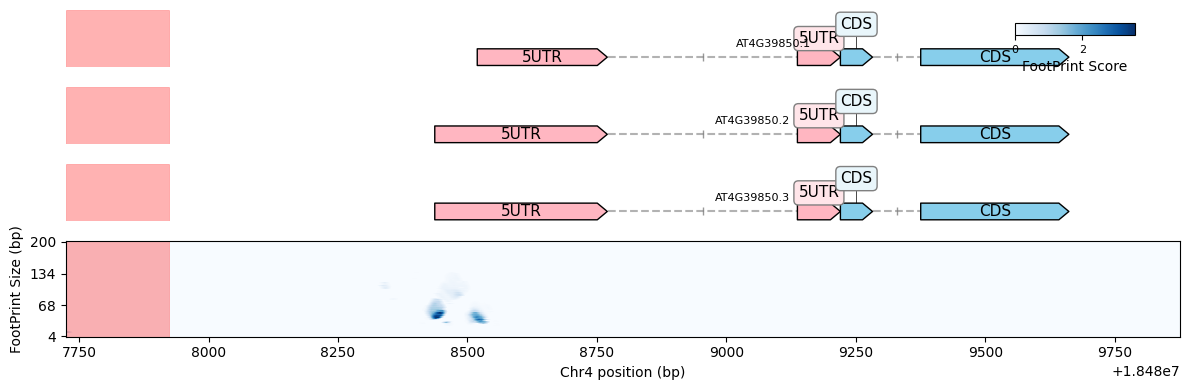

✓ 单组织分析测试成功!


In [3]:

print("Single tissue FootPrint")
print("="*50)

try:
    # 使用叶片数据进行测试
    fig = plot_region_with_footprints(
        genome_fasta=data_config["genome_fasta"],
        gff3_file=data_config["gff3_file"],
        fp_score_file=data_config["fp_files"]["leaf"],
        chrom=data_config["target_region"]["chrom"],
        start=data_config["target_region"]["start"],
        end=data_config["target_region"]["end"],
        # figsize=(12, 8),
        highlight_regions=[(18487724, 18487924)],  # 高亮一个区域
        output_file="./output/single_tissue_footprint.pdf"
    )
    
    plt.show()
    print("✓ 单组织分析测试成功!")
    
except Exception as e:
    print(f"✗ 单组织分析测试失败: {e}")
    import traceback
    traceback.print_exc()


#### Multi tissue FootPrint

多组织比较分析
正在为区域 Chr4:18487724-18489875 创建GenBank文件...
正在解析GFF3文件中 Chr4:18487724-18489875 区域的特征...
收集到 3 个转录本映射
处理了 169 个特征，找到 84 个目标类型特征
最终添加到GenBank的特征数: 12
识别到的转录本:
  AT4G39850.1: 4个组件
    - 5UTR: 795-1046
    - 5UTR: 1413-1496
    - CDS: 1496-1558
    - CDS: 1651-1937
  AT4G39850.2: 4个组件
    - 5UTR: 713-1046
    - 5UTR: 1413-1496
    - CDS: 1496-1558
    - CDS: 1651-1937
  AT4G39850.3: 4个组件
    - 5UTR: 713-1046
    - 5UTR: 1413-1496
    - CDS: 1496-1558
    - CDS: 1651-1937

布局结果（共3行）:
  第1行: AT4G39850.1
  第2行: AT4G39850.2
  第3行: AT4G39850.3
正在处理 inflorescence 组织的footprint数据...
inflorescence: 找到 54945 个footprint数据点
inflorescence 数据最大值: 2.893
正在处理 leaf 组织的footprint数据...
leaf: 找到 54945 个footprint数据点
leaf 数据最大值: 3.567
正在处理 root 组织的footprint数据...
root: 找到 54945 个footprint数据点
root 数据最大值: 2.617
所有组织最大值: 3.567, colorbar最大值: 3.567


/home/wuyuechao/software/DnaFeaturesViewer/dna_features_viewer/FootprintViewer/api.py:330: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


比较图已保存到: ./output/multi_tissue_footprint.pdf
临时GenBank文件已清理


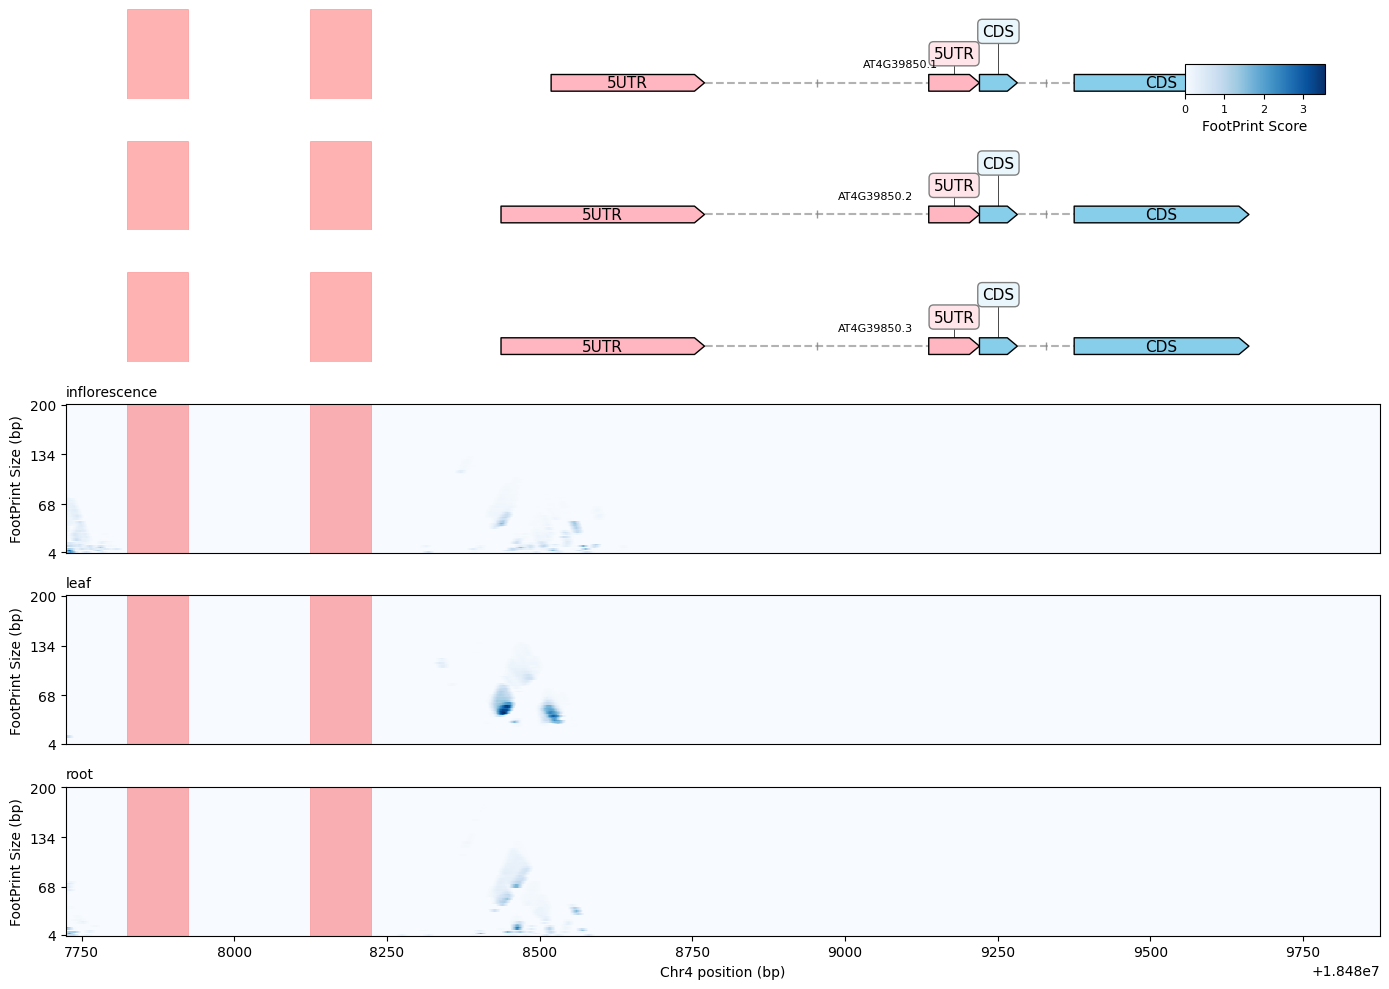

✓ 多组织比较分析测试成功!


In [4]:
# 测试3: 测试多组织比较分析
print("多组织比较分析")
print("="*50)

try:
    # 比较所有三个组织
    fig = plot_multi_tissue_comparison(
        genome_fasta=data_config["genome_fasta"],
        gff3_file=data_config["gff3_file"],
        fp_files_dict=data_config["fp_files"],
        chrom=data_config["target_region"]["chrom"],
        start=data_config["target_region"]["start"],
        end=data_config["target_region"]["end"],
        # figsize=(14, 12),
        highlight_regions=[(18487824, 18487924), (18488124, 18488224)],  # 高亮两个区域
        output_file="./output/multi_tissue_footprint.pdf"
    )
    
    plt.show()
    print("✓ 多组织比较分析测试成功!")
    
except Exception as e:
    print(f"✗ 多组织比较分析测试失败: {e}")
    import traceback
    traceback.print_exc()
